Aluno: Giovanni Bruno Travassos de Carvalho - 11506849

Resolução da primeira questão da primeira lista de exercícios de Deep Learning

Professor: Tiago Maritan 

## Questão 4
Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo,
até predição de três passos, da série temporal x(n) = sen(n + sen²(n)). Avalie o desempenho
mostrando para cada caso os erros de predição.

Dica: Para auxiliar na resolução desse problema você pode usar K entradas (por exemplo,
K=10), que correspondem a K passos anteriores a n: x(n-1), x(n-2),…, x(n-K), e deve fazer a
predição dos valores x(n+1), x(n+2) e x(n+3).

### Primeira Etapa: Geração de Dados

In [2]:
import math
import random
import numpy as np

random.seed(234) 
    
k = 5
passado = [0] * k
futuro = [0] * 3

entrada = open('entrada.txt', 'w')
saida = open('saida.txt', 'w')

for n in range (0,400):

    for i in range (1,k+1):
        passado[i-1]= math.sin(n-i + pow(math.sin(n-i),2))
        entrada.write(str(passado[i-1]))
        if(i!=k):
            entrada.write(', ')
        else:
            entrada.write('\n')
            
    for i in range(1,4):
        futuro[i-1]= math.sin(n+i + pow(math.sin(n+i),2) )
        saida.write(str(futuro[i-1]))
        if(i!=3):
            saida.write(', ')
        else:
            saida.write('\n')

    passado=[0]*k
    futuro=[0]*3

entrada.close()
saida.close()

In [35]:
# Importando Bibliotecas:
import pandas as pd
import tensorflow as tf
import statistics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [4]:
# Carregando Dados: 

X = []
X = np.loadtxt('entrada.txt', dtype=float, delimiter=',', encoding='bytes')

Y = []
Y = np.loadtxt('saida.txt', dtype=float, delimiter=',', encoding='bytes')

print(X)

[[-0.28779783 -0.92198592 -0.16080628  0.2817882   0.80689206]
 [ 0.         -0.28779783 -0.92198592 -0.16080628  0.2817882 ]
 [ 0.99059229  0.         -0.28779783 -0.92198592 -0.16080628]
 ...
 [ 0.18345135 -0.2816475  -0.79058106 -0.37905021  0.28112872]
 [ 0.90956378  0.18345135 -0.2816475  -0.79058106 -0.37905021]
 [ 0.28637921  0.90956378  0.18345135 -0.2816475  -0.79058106]]


In [21]:
# Divisão dos dados em Treino e Teste: 

X_Treino, X_Teste, Y_Treino, Y_Teste = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [22]:
# Normalização dos Dados: 

scaler = StandardScaler()
X_Treino = scaler.fit_transform(X_Treino)
X_Teste = scaler.fit_transform(X_Teste)

In [26]:
# Rede Neural: 

rede = tf.keras.models.Sequential() # Inicialização 
    # Adição de Camadas:
rede.add(tf.keras.layers.Dense(units=5, activation='relu'))
rede.add(tf.keras.layers.Dense(units=7, activation='relu'))
rede.add(tf.keras.layers.Dense(units=6, activation='relu'))
rede.add(tf.keras.layers.Dense(units=3, activation='relu'))

In [31]:
# Compilando a Rede: 

rede.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [32]:
# Treinando a Rede: 

redeTreinada = rede.fit(X_Treino, Y_Treino, validation_split = 0.2, epochs = 100, batch_size = 50, verbose = 2)

Train on 224 samples, validate on 56 samples
Epoch 1/100
 - 0s - loss: 0.2320 - acc: 0.7411 - val_loss: 0.2476 - val_acc: 0.7679
Epoch 2/100
 - 0s - loss: 0.2278 - acc: 0.7500 - val_loss: 0.2456 - val_acc: 0.7679
Epoch 3/100
 - 0s - loss: 0.2248 - acc: 0.7589 - val_loss: 0.2441 - val_acc: 0.8036
Epoch 4/100
 - 0s - loss: 0.2221 - acc: 0.7634 - val_loss: 0.2428 - val_acc: 0.8036
Epoch 5/100
 - 0s - loss: 0.2198 - acc: 0.7634 - val_loss: 0.2414 - val_acc: 0.8036
Epoch 6/100
 - 0s - loss: 0.2178 - acc: 0.7634 - val_loss: 0.2399 - val_acc: 0.8036
Epoch 7/100
 - 0s - loss: 0.2158 - acc: 0.7634 - val_loss: 0.2386 - val_acc: 0.7857
Epoch 8/100
 - 0s - loss: 0.2141 - acc: 0.7634 - val_loss: 0.2374 - val_acc: 0.7679
Epoch 9/100
 - 0s - loss: 0.2128 - acc: 0.7634 - val_loss: 0.2365 - val_acc: 0.7679
Epoch 10/100
 - 0s - loss: 0.2116 - acc: 0.7589 - val_loss: 0.2358 - val_acc: 0.7679
Epoch 11/100
 - 0s - loss: 0.2105 - acc: 0.7455 - val_loss: 0.2351 - val_acc: 0.7679
Epoch 12/100
 - 0s - loss: 0.

In [33]:
# Previsão: 

previsao = rede.predict(X_Teste)

In [34]:
# Calculando a Acurácia

acuracia = statistics.mean(redeTreinada.history['acc'])
print(acuracia)

0.6992411


In [36]:
# Matriz de Confusão: 

confusao = confusion_matrix(Y_Teste.argmax(axis=1), previsao.argmax(axis=1))
print(confusao)

[[61  0  0]
 [ 3  0 16]
 [11  0 29]]


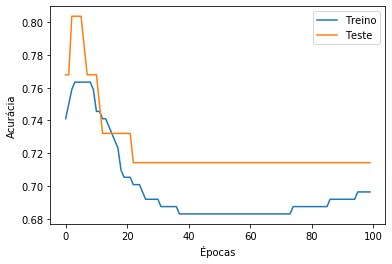

In [37]:
# Gráfico da Acurácia: 

plt.figure(1)
plt.plot(redeTreinada.history['acc'])
plt.plot(redeTreinada.history['val_acc'])
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Teste'])